In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import os
import matplotlib as mpl

In [3]:
os.chdir("E:\BC\Map\Fix")

file1 = "Dasarian1C.nc" # mention the path to the downloaded file
data1 = Dataset(file1, mode='r') # read the data 

file2 = "Dasarian2C.nc" # mention the path to the downloaded file
data2 = Dataset(file2, mode='r') # read the data 

file3 = "Dasarian3C.nc" # mention the path to the downloaded file
data3 = Dataset(file3, mode='r') # read the data 

In [4]:
import xarray as xr

os.chdir("E:\BC\Map\Fix")
xr.open_dataset("Dasarian1C.nc")

<xarray.Dataset>
Dimensions:                   (lat: 21, lon: 22, latv: 2, lonv: 2)
Coordinates:
  * lat                       (lat) float64 -4.5 -4.0 -3.5 -3.0 ... 4.5 5.0 5.5
  * lon                       (lon) float64 106.2 106.9 107.5 ... 118.8 119.4
Dimensions without coordinates: latv, lonv
Data variables:
    M2T1NXAER_5_12_4_BCSMASS  (lat, lon) float32 ...
    lat_bnds                  (lat, latv) float64 ...
    lon_bnds                  (lon, lonv) float64 ...
    shape_mask                (lat, lon) float64 ...
Attributes:
    Conventions:               CF-1.4
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.8 (Homepage = htt...
    history:                   Thu Jan  5 17:23:30 2023: /usr/bin/ncks -O -x ...
    start_time:                2019-08-31T17:00:00Z
    end_time:                  2019-09-10T16:59:59Z
    userstartdate:             2019-08-31T17:00:00Z
    userenddate:               2019-09-10T16:59:59Z
    title:                     Time Averaged Map of Black Carbon Surface Mass...
    plot_hint_title:           Time Averaged Map of Black Carbon Surface Mass...
    plot_hint_subtitle:        over 2019-08-31 17Z - 2019-09-10 16Z, Shape Ka...

In [5]:
lat1 = data1.variables['lat'][:]
lon1 = data1.variables['lon'][:]
bc1 = data1.variables['M2T1NXAER_5_12_4_BCSMASS'][:]
lat_bound1 = data1.variables['lat_bnds'][:]
lon_bound1 = data1.variables['lon_bnds'][:]
shape1 = data1.variables['shape_mask'][:]

lat2 = data2.variables['lat'][:]
lon2 = data2.variables['lon'][:]
bc2 = data2.variables['M2T1NXAER_5_12_4_BCSMASS'][:]
lat_bound2 = data2.variables['lat_bnds'][:]
lon_bound2 = data2.variables['lon_bnds'][:]
shape2 = data2.variables['shape_mask'][:]

lat3 = data3.variables['lat'][:]
lon3 = data3.variables['lon'][:]
bc3 = data3.variables['M2T1NXAER_5_12_4_BCSMASS'][:]
lat_bound3 = data3.variables['lat_bnds'][:]
lon_bound3 = data3.variables['lon_bnds'][:]
shape3 = data3.variables['shape_mask'][:]

In [86]:
type(lat1)

numpy.ma.core.MaskedArray

In [6]:
Fill_Value1 = data1.variables['M2T1NXAER_5_12_4_BCSMASS']._FillValue
Fill_val1 = Fill_Value1*10000000000

bc_fl1 = np.array(bc1)*10000000000
bc_fl1 [bc_fl1 == Fill_val1] = np.nan
bc1 = bc_fl1


Fill_Value2 = data2.variables['M2T1NXAER_5_12_4_BCSMASS']._FillValue
Fill_val2 = Fill_Value2*10000000000

bc_fl2 = np.array(bc2)*10000000000
bc_fl2 [bc_fl2 == Fill_val2] = np.nan
bc2 = bc_fl2

Fill_Value3 = data3.variables['M2T1NXAER_5_12_4_BCSMASS']._FillValue
Fill_val3 = Fill_Value3*10000000000

bc_fl3 = np.array(bc3)*10000000000
bc_fl3 [bc_fl3 == Fill_val3] = np.nan
bc3 = bc_fl3

In [7]:
dh1 = pd.read_excel("E:\BC\Data Hotspot\Dasarian1.xlsx")
lonh1 = np.array(dh1['lon'])
lath1 = np.array(dh1['lat'])


dh2 = pd.read_excel("E:\BC\Data Hotspot\Dasarian2.xlsx")
lonh2 = np.array(dh2['lon'])
lath2 = np.array(dh2['lat'])


dh3 = pd.read_excel("E:\BC\Data Hotspot\Dasarian3.xlsx")
lonh3 = np.array(dh3['lon'])
lath3 = np.array(dh3['lat'])



In [8]:
x1, y1 = np.meshgrid(lon1, lat1)
x2, y2 = np.meshgrid(lon2, lat2)
x3, y3 = np.meshgrid(lon3, lat3)

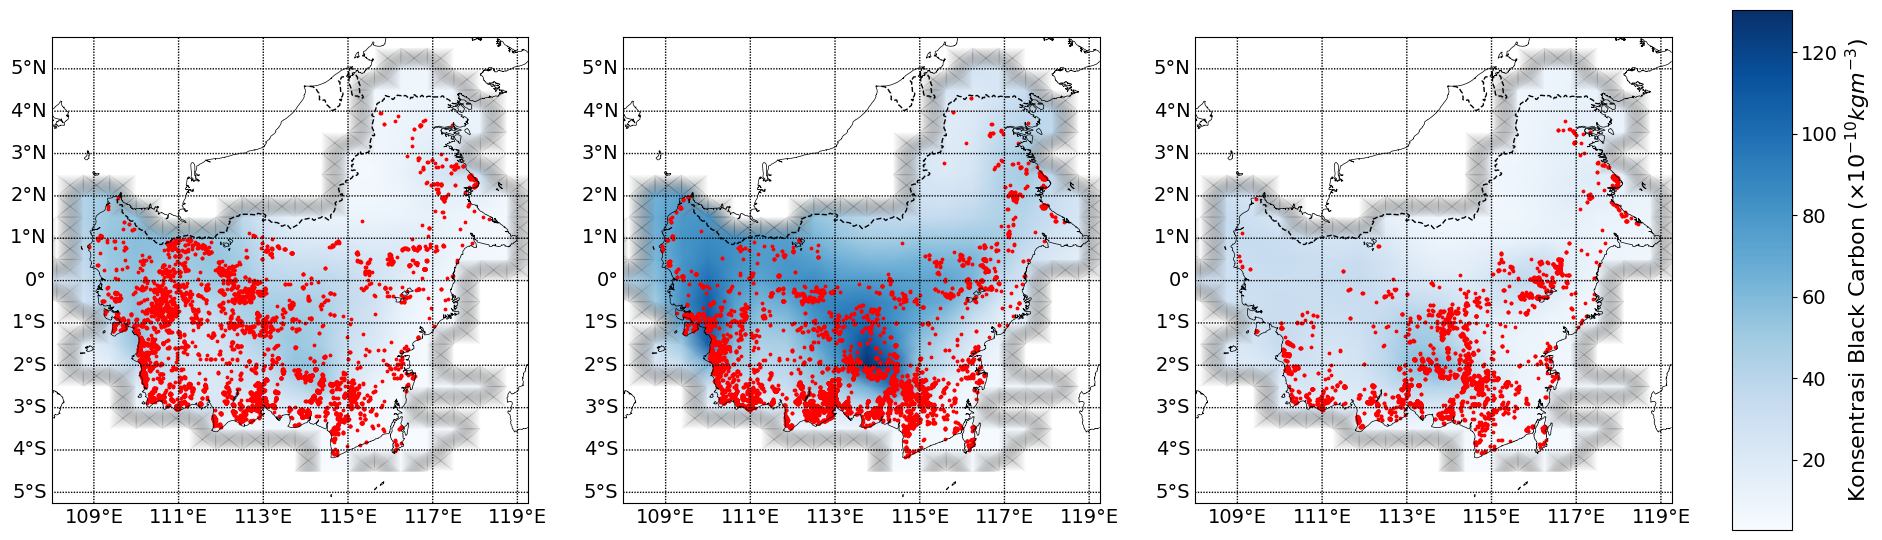

In [9]:
#clevel = np.arange(2.8, 128.8)
norm = mpl.colors.Normalize(vmin=2.75629186142, vmax=130.426434097)

fig = plt.figure(figsize=(24, 13))
ax1=plt.subplot(1, 3, 1)
m = Basemap(projection = 'cyl', resolution = 'h',
            llcrnrlat = -5.25,
            urcrnrlat = 5.75,
            llcrnrlon = 108,
            urcrnrlon = 119.25)
parallels = np.arange(-5, 6, 1)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=14)
meridians = np.arange(109,119.25, 2)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=14)
m.drawcoastlines(color='black', linewidth=0.5)
m.drawcountries(linewidth = 1, linestyle='dashed')
#m.contourf(x1, y1, bc1, clevel, cmap='binary', extend='both')
m.pcolormesh(x1, y1, bc1, latlon = False, norm=norm, cmap = 'Blues', shading='gouraud')
plt.scatter(lonh1, lath1, s=3, c='red',alpha=1)
#--------------------------------------------------------------------
ax2=plt.subplot(1, 3, 2)
m = Basemap(projection = 'cyl', resolution = 'h',
            llcrnrlat = -5.25,
            urcrnrlat = 5.75,
            llcrnrlon = 108,
            urcrnrlon = 119.25)
parallels = np.arange(-5, 6, 1)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=14)
meridians = np.arange(109,119.25, 2)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=14)
m.drawcoastlines(color='black', linewidth=0.5)
m.drawcountries(linewidth = 1, linestyle='dashed')
#m.contourf(x2, y2, bc2, clevel, cmap='binary', extend='both')
m.pcolormesh(x2, y2, bc2, latlon = False, norm=norm, cmap = 'Blues', shading='gouraud')
plt.scatter(lonh2, lath2, s=3, c='red',alpha=1)
#--------------------------------------------------------------------
ax3=plt.subplot(1, 3, 3)
m = Basemap(projection = 'cyl', resolution = 'h',
            llcrnrlat = -5.25,
            urcrnrlat = 5.75,
            llcrnrlon = 108,
            urcrnrlon = 119.25)
parallels = np.arange(-5, 6, 1)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=14)
meridians = np.arange(109,119.25, 2)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=14)
m.drawcoastlines(color='black', linewidth=0.5)
m.drawcountries(linewidth = 1, linestyle='dashed')
#m.contourf(x3, y3, bc3, clevel, cmap='binary', extend='both')
m.pcolormesh(x3, y3, bc3, latlon = False, norm=norm, cmap = 'Blues', shading='gouraud')
plt.scatter(lonh3, lath3, s=3, c='red',alpha=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.825, 0.295, 0.025, 0.4])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap='Blues'), cax=cbar_ax)
cbar.set_label(r'Konsentrasi Black Carbon ($ \times 10^{-10} kgm^{-3}$)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
plt.autoscale()
plt.show()